# Glioma Grading Clinical and Mutation Features
## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Reading data

In [4]:
glioma_data = pd.read_csv("TCGA_InfoWithGrade.csv")

## Separating data into training and test

In [5]:
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



values = glioma_data[
    [
        "Gender",
        "Age_at_diagnosis",
        "Race",
        "IDH1",
        "TP53",
        "ATRX",
        "PTEN",
        "EGFR",
        "CIC",
        "MUC16",
        "PIK3CA",
        "NF1",
        "PIK3R1",
        "FUBP1",
        "RB1",
        "NOTCH1",
        "BCOR",
        "CSMD3",
        "SMARCA4",
        "GRIN2A",
        "IDH2",
        "FAT4",
        "PDGFRA",
    ]
]

target = glioma_data["Grade"]

(training_values,
 testing_values,
 training_target,
 testing_target) = train_test_split(values, target, test_size=0.25, random_state=1)


  
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error Percentage")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Convert scores to errors
    train_error_mean = 1 - train_scores_mean
    train_error_std = train_scores_std
    test_error_mean = 1 - test_scores_mean
    test_error_std = test_scores_std

    plt.grid()

    # Fill between for confidence intervals
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Plot lines for mean error rates
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation Score")

    plt.legend(loc="best")
    return plt





# K-Nearest Neighbours

Best k: 8


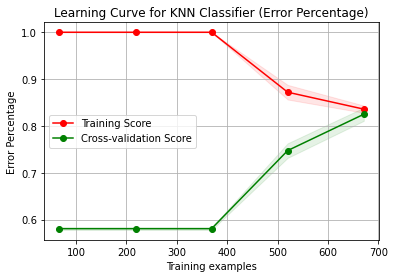

Accuracy: 0.780952380952381
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       115
           1       0.78      0.73      0.75        95

    accuracy                           0.78       210
   macro avg       0.78      0.78      0.78       210
weighted avg       0.78      0.78      0.78       210

[[95 20]
 [26 69]]


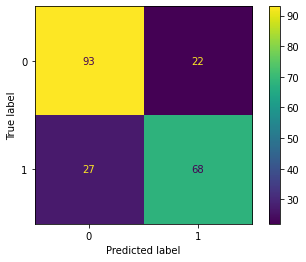

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

knn_default = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 30)}


knn = GridSearchCV(knn_default, param_grid, cv=5)

knn.fit(training_values, training_target)

target_pred = knn.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)

best_k = knn.best_params_['n_neighbors']
print(f"Best k: {best_k}")

plot_learning_curve(knn, "Learning Curve for KNN Classifier (Error Percentage)", values, target, cv=5, n_jobs=-1)

# Show the plot
plt.show()

print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(testing_target, target_pred))
disp.plot()


## SVM
### Linear kernel

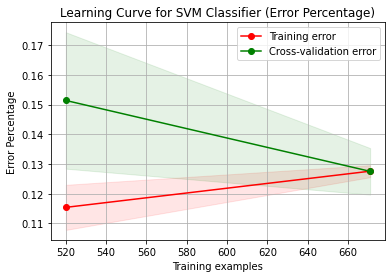

Accuracy: 0.861904761904762
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       115
           1       0.82      0.89      0.85        95

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.87      0.86      0.86       210

[[96 19]
 [10 85]]


In [15]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear")

svm_model.fit(training_values, training_target)

target_pred = svm_model.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)

plot_learning_curve(svm_model, "Learning Curve for SVM Classifier (Error Percentage)", values, target, cv=5, n_jobs=-1)

# Show the plot
plt.show()

print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

### Sigmoid kernel

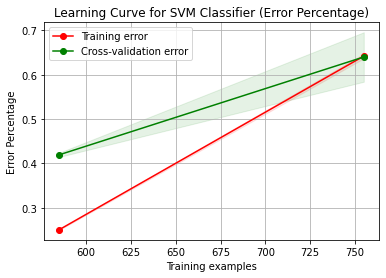

Accuracy: 0.37142857142857144
              precision    recall  f1-score   support

           0       0.44      0.53      0.48       115
           1       0.24      0.18      0.20        95

    accuracy                           0.37       210
   macro avg       0.34      0.35      0.34       210
weighted avg       0.35      0.37      0.36       210

[[61 54]
 [78 17]]


In [10]:
svm_model = SVC(kernel="sigmoid")

svm_model.fit(training_values, training_target)

target_pred = svm_model.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)

plot_learning_curve(svm_model, "Learning Curve for SVM Classifier (Error Percentage)", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()

print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

### Polynomial kernel

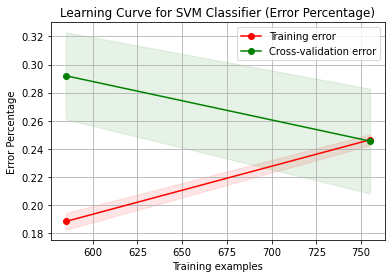

Accuracy: 0.6904761904761905
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       115
           1       0.72      0.52      0.60        95

    accuracy                           0.69       210
   macro avg       0.70      0.68      0.67       210
weighted avg       0.70      0.69      0.68       210

[[96 19]
 [46 49]]


In [11]:
svm_model = SVC(kernel="poly")

svm_model.fit(training_values, training_target)

target_pred = svm_model.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)

plot_learning_curve(svm_model, "Learning Curve for SVM Classifier (Error Percentage)", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()

print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

### Radial Basis Function kernel

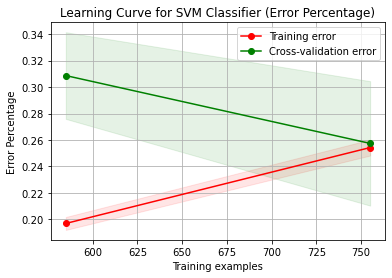

Accuracy: 0.6904761904761905
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       115
           1       0.71      0.54      0.61        95

    accuracy                           0.69       210
   macro avg       0.69      0.68      0.68       210
weighted avg       0.69      0.69      0.68       210

[[94 21]
 [44 51]]


In [12]:
svm_model = SVC(kernel="rbf")

svm_model.fit(training_values, training_target)

target_pred = svm_model.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)

plot_learning_curve(svm_model, "Learning Curve for SVM Classifier (Error Percentage)", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()

print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

## Decision trees

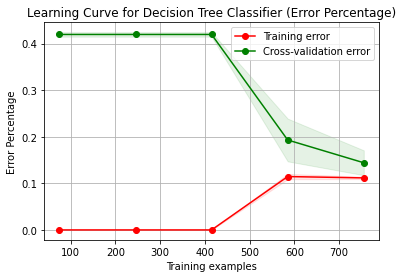

Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       115
           1       0.82      0.88      0.85        95

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210

[[96 19]
 [11 84]]


In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=1)

decision_tree.fit(training_values, training_target)

target_pred = decision_tree.predict(testing_values)

accuracy = accuracy_score(testing_target, target_pred)

plot_learning_curve(decision_tree, "Learning Curve for Decision Tree Classifier (Error Percentage)", values, target, cv=10, n_jobs=-1)

# Show the plot
plt.show()

print(f"Accuracy: {accuracy}")

print(classification_report(testing_target, target_pred))

print(confusion_matrix(testing_target, target_pred))

## Random Forests

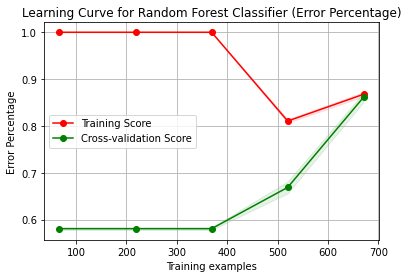

Training Accuracy: 0.875993640699523
Test Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       115
           1       0.81      0.82      0.82        95

    accuracy                           0.83       210
   macro avg       0.83      0.83      0.83       210
weighted avg       0.83      0.83      0.83       210

[[97 18]
 [17 78]]


In [7]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=501, max_depth=2, random_state=1)



#param_grid = {'n_estimators': np.arange(1, 1000, 100), 'max_depth': np.arange(1, 3)}


#random_forest = GridSearchCV(random_forest_default, param_grid, cv=5)

random_forest.fit(training_values, training_target)

training_target_pred = random_forest.predict(training_values)
test_target_pred = random_forest.predict(testing_values)

#print(random_forest.best_params_)

plot_learning_curve(random_forest, "Learning Curve for Random Forest Classifier (Error Percentage)", values, target, cv=5, n_jobs=-1)

# Show the plot
plt.show()

accuracy = accuracy_score(training_target, training_target_pred)


print(f"Training Accuracy: {accuracy}")
accuracy = accuracy_score(testing_target, test_target_pred)
print(f"Test Accuracy: {accuracy}")

print(classification_report(testing_target, test_target_pred))

print(confusion_matrix(testing_target, test_target_pred))